# Analysis of Fatal Shootings in America¶
Jesse Ekweozoh, Nistha Mitra and William Jonathan Faoro
INTRODUCTION
The central objective of this project is to analyze a dataset containing fatal shootings by police and the disproportionate impact on Black, Indigenous and People of Color in the US between 2015 and 2020. In the midst of racism discussions, we hope to likely shed light on the situation.

We will use data analysis tools and techniques to reveal some numbers that summarize the dataset. This post is aimed to be a practical guide of data analysis and a discussion that approaches police shootings in the US from many perspectives.
The dataset is available in this repo by the Washington Post. We will be using python data analysis and visualization libraries. 
REQUIRED TOOLS
The following libraries will be used for this project:

requests
pandas
numpys
datetime
matplotlib.pyplot
We highly recommend referring to the following resources for more information about pandas/installation and python 3.6 in general:

1. https://pandas.pydata.org/pandas-docs/stable/install.html
2. https://docs.python.org/3/

### **DATA COLLECTION**

In [2]:
import pandas as pd #pandas
import numpy as np #module
import seaborn as sns #to visualize
import matplotlib.pyplot as plt #for plotting
from bs4 import BeautifulSoup
import requests

We start by generating a dataframe table that stores contents of the csv file using the pandas.read_csv function (more info at: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html) reads in the table that contains all the data and puts it into a DataFrame for us. '

A DataFrame is a structure similar to a table or matrix, with rows and columns that contain certain data. Pandas allows us to easily perform a lot of manipulations on DataFrames through the use of their functions. You can find more info at: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html.

NEED DESCRIPTION FOR DATAFRAMES HERE!.

The head of the resulting DataFrame is printed below.

In [3]:
df = pd.read_csv("https://github.com/washingtonpost/data-police-shootings/releases/download/v0.1/fatal-police-shootings-data.csv")

In [4]:
df1 = pd.read_csv("https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2016_US_County_Level_Presidential_Results.csv")
df3= pd.read_csv("https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv")

In [5]:
print("Fatal shooting dataset has {}".format(df.shape[0]),
"rows and {}".format(df.shape[1]), "columns")
df.head(2)

Fatal shooting dataset has 5884 rows and 17 columns


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True


In [6]:
print("Fatal shooting dataset has {}".format(df1.shape[0]),
"rows and {}".format(df1.shape[1]), "columns")
df1.head(2)

Fatal shooting dataset has 3141 rows and 11 columns


,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2013
1,1,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2016


In [7]:
# WHAT DO WE USE THIS LIST FOR?
df3=df3.rename(columns = {'Abbreviation':'state', 'State':'state_name'})
df3.head(3)

,state_name,state
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ


### **DATA CLEANING**
The section below is the data cleaning stage of the data life cycle. For most of this step, we attempt to organize our data in such a way that is readable which will make it easier for us to perform analysis. This includes altering the structure of a DataFrame would be considered tidying data or data wrangling.

You can get more information at: https://www.nobledesktop.com/learn/python/data-wrangling-python-guide

We are essentially reformatting our DataFrame to correspond with the format provided by the Washington Post website. Success in performing this step in the lifecycle very important to facilitate manipulation and flexibility for any future analysis.

We decide to eliminate sensitive information on the deceased persons from our dataset while filling out missing entries to ensure we have complete data in our analysis

/* I WILL INCLUDE MORE IN THIS WRITEUP AS I NEED TO KNOW WHAT CERTAIN PARTS OF THE CODE IS DOING AND Y'ALL ARE ASLEEP*/

The head of the resulting DataFrame is again printed below.

In [8]:
# We will group our dataframe by state 
df= df.join(df3.set_index('state'), on='state')
df.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,state_name
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,Washington
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,Oregon
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,Kansas


It makes sense that we first group our datasets by state to allow us get a better understanding of our dataset with relation to the US. 

In [ ]:
# this indicates a disproportionate amount of unrecorded fatal killings by the police 
df.body_camera.value_counts()

next, we begin to explore specific yet important criterias of our dataset which contributes to our analysis.  

In [10]:
# we will eliminate explicit details on the deceased persons from our datasest
df.drop(['id','name', 'body_camera'], axis=1, inplace=True)
df.head(2)

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,longitude,latitude,is_geocoding_exact,state_name
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,-123.122,47.247,True,Washington
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,-122.892,45.487,True,Oregon


We value people's privacy hence we drop sensitive informations on the deceased persons. i.e. their id, name and (body camera -?)

In [11]:
# we will also keep count of missing entries in the dataframe
df.isna().sum()

date                         0
manner_of_death              0
armed                      212
age                        256
gender                       1
race                       546
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       324
longitude                  288
latitude                   288
is_geocoding_exact           0
state_name                   0
dtype: int64

It is always important to ensure a complete dataset for an effective analysis. So we count the number of missing entries per column (and do what with it??)

<AxesSubplot:>

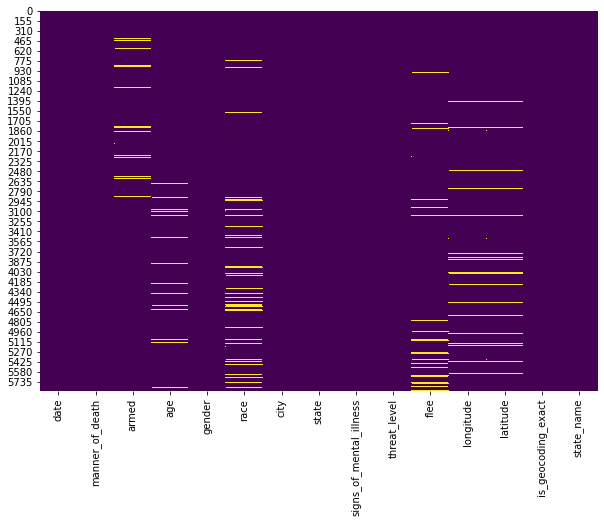

In [12]:
plt.figure(figsize=(10,7))
# NOT SURE WHAT THIS PLOT REPRESENTS!
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

/* TO-DO */
EXPLAIN THE SIGNIFICANCE OF THIS CHART, IM WAY TOO SLEEPY TO FIGURE IT OUT

In [13]:
# we observe that most people that were killed by the police did not flee
df.flee.value_counts()

Not fleeing    3643
Car             967
Foot            758
Other           192
Name: flee, dtype: int64

Here the numbers suggests that most people that were killed by the police did not flee before they were killed. Infact, the number of people that fled by different means still collectively falls short of those who did not flee

In [14]:
# we also observe the weapon counts of the deceased persons which indicates guns as the most popular weapon used against the police
df.armed.value_counts()

gun                       3366
knife                      861
unarmed                    374
toy weapon                 195
undetermined               174
                          ... 
vehicle and machete          1
baseball bat and knife       1
hand torch                   1
bayonet                      1
claimed to be armed          1
Name: armed, Length: 95, dtype: int64

It makes sense that guns were the most popular weapon to be used against the police as it is the most dangerous/effective weapon in the list, second to knives. It is also quite interesting to see unarmed persons as the third position on the list, while you may find humor in the 4th item.

In [15]:
# we include the information above in our dataframe and set the missing flee entries to indicate that the persons did not flee
df.armed.fillna(df.armed.value_counts().index[0], inplace=True)
df.flee.fillna('Not fleeing', inplace=True)

/**TO DO**

In [16]:
# then we make sure our dataset is complete with no missing entries
df.dropna(axis=0, how='any', inplace=True)
print("There are {}".format(df.isna().sum().sum()), "missing values left in the dataframe")

There are 0 missing values left in the dataframe


/**TO DO**

<AxesSubplot:>

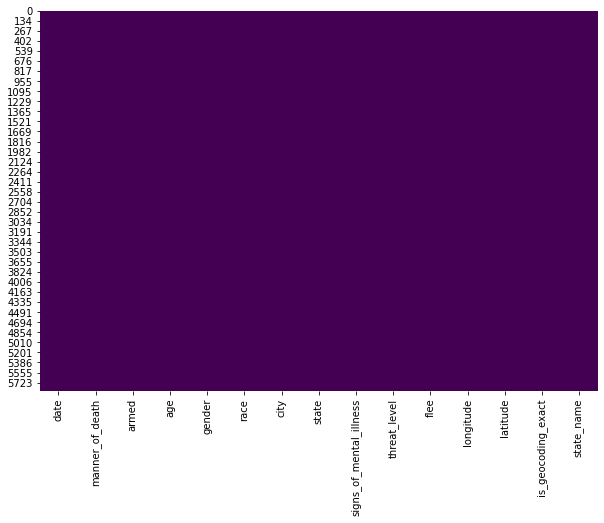

In [17]:
# AGAIN NOT SURE WHAT THIS PLOT SIGNIFIES
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

/**TO DO**

In [18]:
# PLEASE SPECIFY THE GOAL OF THIS CELL...IM SLEEPY AF RN
df['date'] = pd.to_datetime(df['date'])
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['h_yr'] = np.where(df['month'] > 6, 2, 1)

/**TO DO**

In [19]:
# HERE AS WELL
df.insert(2, 'Count_h_yr', df.groupby(['year','h_yr','state'])['year'].transform('size'))
df.insert(2, 'Count_per_year', df.groupby(['year','state'])['year'].transform('size'))

/**TO DO**

In [20]:
# OH LOOK, HERE TOO
df['h_yr']= df['year'].astype(int)*10 + df['h_yr'].astype(int)
df.head(2)

,date,manner_of_death,Count_per_year,Count_h_yr,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,longitude,latitude,is_geocoding_exact,state_name,year,month,h_yr
0,2015-01-02,shot,16,8,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,-123.122,47.247,True,Washington,2015,1,20151
1,2015-01-02,shot,14,8,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,-122.892,45.487,True,Oregon,2015,1,20151


/**TO DO**

### **STATE WISE DATA KILL**
Next, we analyse kills based on state and we can see the states of Alaska, Alabama and Arkansas contain the highest rate of police killings in the US. 

I STILL NEED TO ADD MORE

In [21]:
# WASN'T THIS ALREADY DONE IN THE FIRST PART?
kill_st=df.groupby(['state']).size().reset_index(name='counts')
kill_st.head(3)

,state,counts
0,AK,31
1,AL,89
2,AR,60


/**TO DO**

In [22]:
# PLEASE COMMENT ON THE GOAL OF THIS DATAFRAME AND CELLS BELOW (WHAT YOU HOPE TO ACHIEVE/ANSWER)
df1.drop(['Unnamed: 0','total_votes','per_dem','per_gop','diff','per_point_diff','combined_fips','county_name'], axis=1, inplace=True)
df1=df1.rename(columns = {'state_abbr':'state'})

/**TO DO**

In [23]:
df1= df1.join(df3.set_index('state'), on='state')
df1.head(3)

,votes_dem,votes_gop,state,state_name
0,93003.0,130413.0,AK,Alaska
1,93003.0,130413.0,AK,Alaska
2,93003.0,130413.0,AK,Alaska


/**TO DO**

In [24]:
df1 = df1.groupby(['state']).agg({'votes_dem' : 'sum', 'votes_gop': 'sum'}).reset_index()
df1['pol_m'] = np.where(df1['votes_dem'] > df1['votes_gop'], "Blue", "Red")

/**TO DO**

In [25]:
by_state = pd.DataFrame()
by_state= pd.merge(df1, kill_st, on='state')
by_state= by_state.join(df3.set_index('state'), on='state')

In [26]:
by_state.head()

,state,votes_dem,votes_gop,pol_m,counts,state_name
0,AK,2697087.0,3781977.0,Red,31,Alaska
1,AL,718084.0,1306925.0,Red,89,Alabama
2,AR,378729.0,677904.0,Red,60,Arkansas
3,AZ,936250.0,1021154.0,Red,224,Arizona
4,CA,7362490.0,3916209.0,Blue,723,California


/**TO DO**

### **DATASET BY STATE AND TIME**
/**TO DO**

In [27]:
df2= df.copy()
df2 = df2.drop(['manner_of_death','date','month','armed','age','gender','race','city','signs_of_mental_illness','threat_level','flee','longitude','latitude','is_geocoding_exact'], 1)

In [28]:
# dropping duplicate values 
df2= df2.drop_duplicates(['year','state'],keep= 'last')
df2.reset_index(inplace=True)
df2.drop(['index'], axis=1, inplace=True)

In [29]:
df2= df2.sort_values(['state_name'])

In [30]:
df2.tail(10)

,Count_per_year,Count_h_yr,state,state_name,year,h_yr
20,11,6,WI,Wisconsin,2015,20152
129,21,9,WI,Wisconsin,2017,20172
56,16,7,WI,Wisconsin,2016,20162
219,15,9,WI,Wisconsin,2019,20192
128,1,1,WY,Wyoming,2017,20172
22,5,4,WY,Wyoming,2015,20152
54,2,2,WY,Wyoming,2016,20161
266,1,1,WY,Wyoming,2020,20202
205,1,1,WY,Wyoming,2019,20192
155,3,1,WY,Wyoming,2018,20182


/**TO DO**

### **DATA VISUALIZATION**

### **BY IDENTITY**

### **BY STATE**
/**TO DO**

In [31]:
##run a for loop to make seperate dataframes based on yearID and use Seaborn to plot them

by_state.set_index('state_name', inplace=True)

In [32]:
by_state.head()

,state,votes_dem,votes_gop,pol_m,counts
state_name,,,,,
Alaska,AK,2697087.0,3781977.0,Red,31
Alabama,AL,718084.0,1306925.0,Red,89
Arkansas,AR,378729.0,677904.0,Red,60
Arizona,AZ,936250.0,1021154.0,Red,224
California,CA,7362490.0,3916209.0,Blue,723


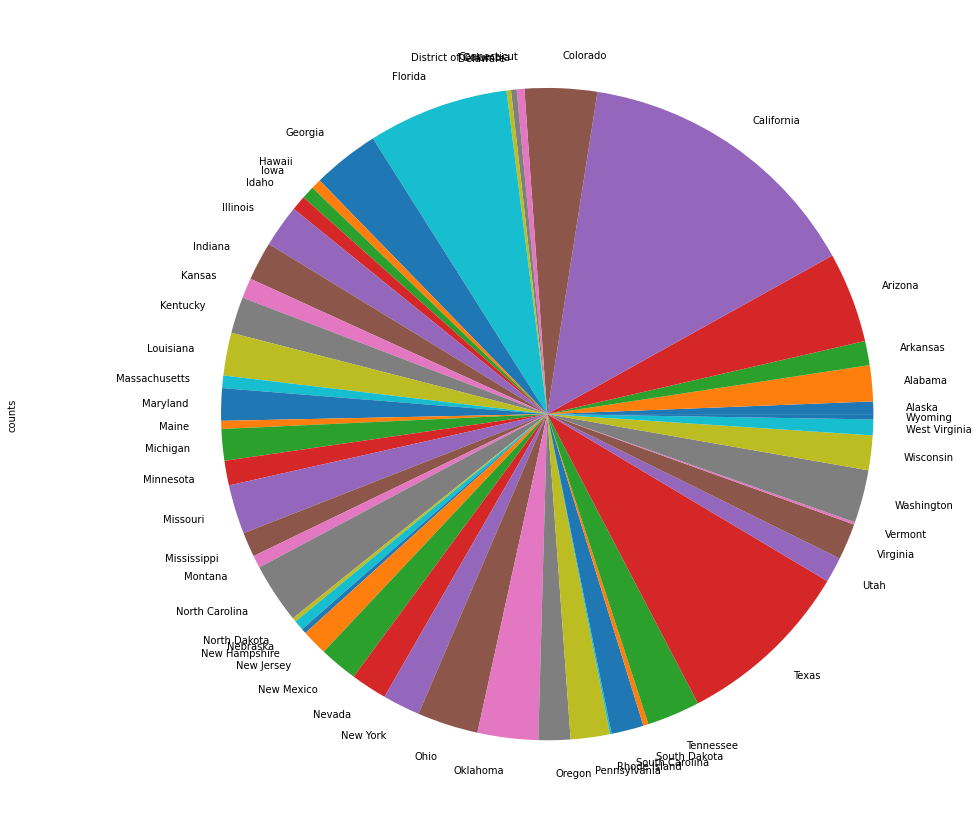

In [33]:
ax=by_state['counts'].plot(kind='pie', figsize=(20, 15))
ax.set_aspect('equal')
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.show()

In [34]:
high_rate = df2.pivot(index='year', columns='state_name', values='Count_per_year')

In [35]:
high_rate

state_name,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
2015,17.0,4.0,42.0,4.0,180.0,28.0,2.0,3.0,4.0,61.0,...,3.0,19.0,97.0,10.0,1.0,18.0,16.0,8.0,11.0,5.0
2016,21.0,6.0,43.0,12.0,123.0,27.0,4.0,1.0,5.0,56.0,...,4.0,21.0,75.0,8.0,2.0,16.0,23.0,7.0,16.0,2.0
2017,20.0,5.0,38.0,9.0,139.0,26.0,5.0,5.0,2.0,53.0,...,3.0,23.0,58.0,7.0,1.0,20.0,27.0,8.0,21.0,1.0
2018,10.0,5.0,44.0,15.0,87.0,32.0,1.0,NaN,1.0,59.0,...,1.0,25.0,67.0,15.0,2.0,17.0,16.0,5.0,9.0,3.0
2019,11.0,6.0,28.0,12.0,102.0,33.0,3.0,NaN,1.0,54.0,...,2.0,27.0,81.0,9.0,NaN,8.0,27.0,8.0,15.0,1.0
2020,10.0,5.0,29.0,8.0,92.0,33.0,4.0,2.0,1.0,66.0,...,NaN,16.0,62.0,14.0,NaN,11.0,22.0,3.0,14.0,1.0


/**TO DO**

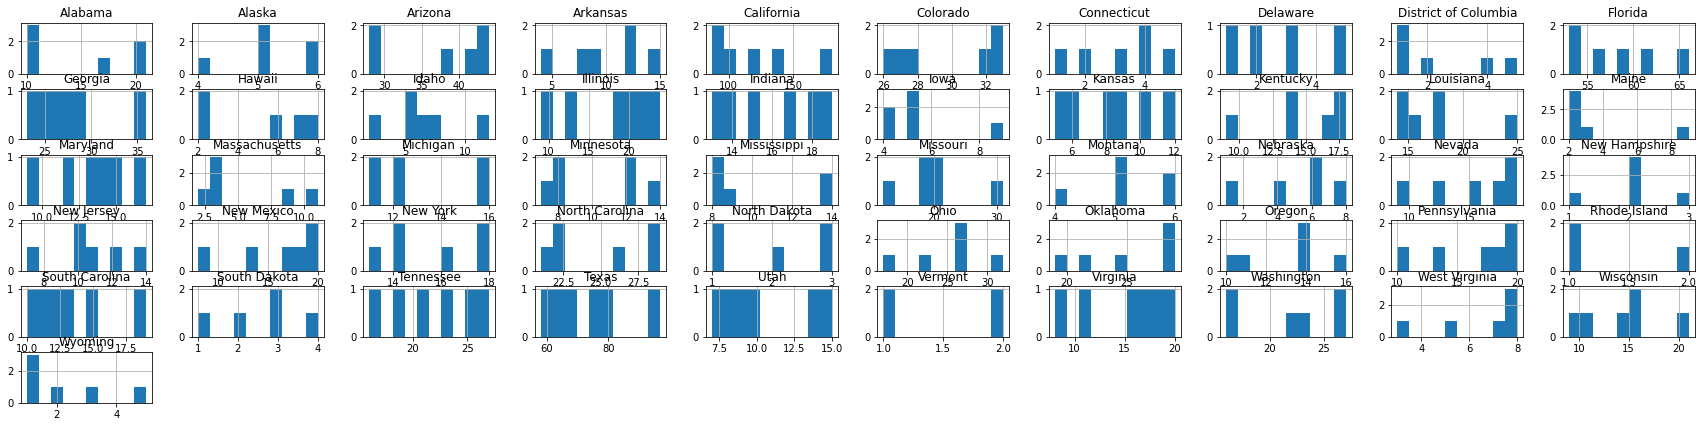

In [36]:
high_rate.hist(layout=(25,10), figsize=(30,30))

plt.show()

/**TO DO**

### **BY POLITICAL AFFILIATION**
/**TO DO**

In [37]:
# PLEASE FIX ERROR BELOW
by_state= pd.merge(df1, count, on='state')
by_state.head()

NameError: name 'count' is not defined

In [ ]:
by_pol= by_state.groupby(['pol_m']).agg({'counts' : 'sum'}).reset_index()
by_pol.reset_index(drop=True)

In [ ]:
br= by_pol.plot(kind='bar',x='pol_m',y='counts', 
        color=["blue","red"]) 
br.set_xlabel("Democrat Vs Republican")
br.set_ylabel("Fatal Police Shooting")

/**TO DO**

### **BY LOCATION**
/**TO DO**

In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [39]:
locationInfo =  pd.read_csv("https://github.com/washingtonpost/data-police-shootings/releases/download/v0.1/fatal-police-shootings-data.csv")
locationInfo = locationInfo[pd.notnull(locationInfo['latitude'])]
locationInfo = locationInfo[pd.notnull(locationInfo['longitude'])]
locationInfo.head()
map_PoliceKillings = folium.Map()

# Ensure you're handing it floats

sampdata = locationInfo.sample(n=1000)
killstable = sampdata

#for index, row in killstable.iterrows():
#  if (row["age"] < 18 or row["age"] > 25):
#    killstable = killstable.drop(index)


print(killstable.head())


heat_data = [[row['latitude'],row['longitude']] for index,row in sampdata.iterrows()]
HeatMap(heat_data,radius=25).add_to(map_PoliceKillings)


for index,row in sampdata.iterrows():
    color = ''
    if row['race'] == 'B':
      color = 'black'
    if row['race'] == 'W':
      color = 'white'
    if row['race'] == 'U':
      color = 'green'
    if row['race'] == 'A':
      color = 'yellow'
    if row['race'] == 'I':
      color = 'blue'
    if row['race'] == 'H':
      color = 'purple'
    if row['race'] == np.nan:
      color = 'crimson'
    folium.CircleMarker(radius = 5,
      location = [row['latitude'],row['longitude']],
      popup=row['manner_of_death'],
      color=color,
      fill=True,
      fill_color=color,
      fill_opacity=0.7
).add_to(map_PoliceKillings)


map_PoliceKillings

        id              name        date manner_of_death  armed   age gender  \
110    149  Jason C. Hendrix  2015-02-14            shot    gun  16.0      M   
2405  2668    Michael Morris  2017-06-14            shot  knife  54.0      M   
589    718    Mark Keckhafer  2015-08-07            shot    NaN  53.0      M   
3422  3758   Roger Dale Sims  2018-06-06            shot    gun  56.0      M   
5709  6373     Justin Dawley  2020-10-16            shot  knife   NaN      M   

     race        city state  signs_of_mental_illness threat_level  \
110     W       Essex    MD                     True       attack   
2405    W  Somerville    TN                     True        other   
589     W    Superior    MT                    False        other   
3422    W    LaGrange    GA                     True       attack   
5709    W    Callahan    FL                     True       attack   

             flee  body_camera  longitude  latitude  is_geocoding_exact  
110           Car        False

/**TO DO**

### **BY LOCATION AND AGE**
/**TO DO**

In [40]:
import folium
from folium import plugins
from folium.plugins import HeatMap

locationInfo =  pd.read_csv("https://github.com/washingtonpost/data-police-shootings/releases/download/v0.1/fatal-police-shootings-data.csv")
locationInfo = locationInfo[pd.notnull(locationInfo['latitude'])]
locationInfo = locationInfo[pd.notnull(locationInfo['longitude'])]
locationInfo.head()
map_PoliceKillings = folium.Map()

# Ensure you're handing it floats

sampdata = locationInfo.sample(n=1000)
killstable = sampdata

#for index, row in killstable.iterrows():
#  if (row["age"] < 18 or row["age"] > 25):
#    killstable = killstable.drop(index)


print(killstable.head())


heat_data = [[row['latitude'],row['longitude']] for index,row in sampdata.iterrows()]
HeatMap(heat_data,radius=25).add_to(map_PoliceKillings)


for index,row in sampdata.iterrows():
    color = ''
    if row['race'] == 'B':
      color = 'black'
    if row['race'] == 'W':
      color = 'white'
    if row['race'] == 'U':
      color = 'green'
    if row['race'] == 'A':
      color = 'yellow'
    if row['race'] == 'I':
      color = 'blue'


        id                  name        date manner_of_death         armed  \
1150  1318  Christopher J. Davis  2016-02-24            shot       unarmed   
833    980         Jeremy Mardis  2015-11-03            shot       unarmed   
1621  1803        Pedro Montanez  2016-08-20            shot         knife   
2561  2839  Kyle Andrew Lankford  2017-08-06            shot         knife   
551    676  Christopher Olmstead  2015-07-25            shot  blunt object   

       age gender race         city state  signs_of_mental_illness  \
1150  21.0      M    B    East Troy    WI                    False   
833    6.0      M    W   Marksville    LA                    False   
1621  71.0      M    H        Indio    CA                    False   
2561  32.0      M    W     Bon Aqua    TN                    False   
551   60.0      M    W  New Orleans    LA                     True   

     threat_level         flee  body_camera  longitude  latitude  \
1150        other          Car        Fals

/**TO DO**